In [113]:
import pandas as pd

store = pd.HDFStore('../storage/encode_fantom_stats.hdf')

In [114]:
store.keys()

['/overlap_hg19_DNase_H3K27ac_immortalized_cell_line',
 '/overlap_hg19_DNase_H3K27ac_immortalized_cell_line_permissive',
 '/overlap_hg19_DNase_H3K27ac_in_vitro_differentiated_cells',
 '/overlap_hg19_DNase_H3K27ac_induced_pluripotent_stem_cell_line',
 '/overlap_hg19_DNase_H3K27ac_primary_cell',
 '/overlap_hg19_DNase_H3K27ac_stem_cell',
 '/overlap_hg19_DNase_H3K27ac_stem_cell_permissive',
 '/overlap_hg19_DNase_H3K27ac_tissue',
 '/overlap_hg19_DNase_H3K27ac_tissue_permissive',
 '/reldist_hg19_DNase_H3K27ac_immortalized_cell_line',
 '/reldist_hg19_DNase_H3K27ac_immortalized_cell_line_permissive',
 '/reldist_hg19_DNase_H3K27ac_in_vitro_differentiated_cells',
 '/reldist_hg19_DNase_H3K27ac_induced_pluripotent_stem_cell_line',
 '/reldist_hg19_DNase_H3K27ac_primary_cell',
 '/reldist_hg19_DNase_H3K27ac_stem_cell',
 '/reldist_hg19_DNase_H3K27ac_stem_cell_permissive',
 '/reldist_hg19_DNase_H3K27ac_tissue',
 '/reldist_hg19_DNase_H3K27ac_tissue_permissive']

In [115]:
store.close()

In [139]:
def plot_jaccard(ovlp_df, legend_label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    colors = sns.color_palette('muted').as_hex()[:10]
    
    sns.set(style="whitegrid")
    %matplotlib inline
    sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
    ax = sns.pointplot(x="min_ovlp", y="jaccard", data=ovlp_df.query('ovlp_encyclopedia=="permissive"'),
                       capsize=.2, size=6, aspect=1, linestyles=["--"], color=colors[0])
    sns.pointplot(x="min_ovlp", y="jaccard", data=ovlp_df.query('ovlp_encyclopedia=="SHUFFLED"'),
                       capsize=.2, size=6, aspect=1, linestyles=["--"], color=colors[2])

    ax.axes.set_ylabel("Mean Jaccard similarity index",size = 13,color="black",alpha=1)
    ax.axes.set_xlabel("Overlap fraction over FANTOM",size = 13,color="black",alpha=1)
    ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)

    ax.axes.set_ylim(0,)

    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 4 == 0:  # every 4th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    green_patch = mpatches.Patch(color=colors[0], label=legend_label)
    blue_patch = mpatches.Patch(color=colors[2], label='Shuffled null model')

    plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)
    plt.show()
    

In [147]:
def plot_reldist(reldist_df, legend_label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    
    colors = sns.color_palette('muted').as_hex()[:10]
        
    sns.set(style="whitegrid")
    %matplotlib inline
    sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
    ax = sns.pointplot(x="reldist", y="ovlp_fraction", data=reldist_df.query('ovlp_encyclopedia=="permissive"'),
                       capsize=.2, size=6, aspect=1, linestyles=["--"], color=colors[0])
    sns.pointplot(x="reldist", y="ovlp_fraction", data=reldist_df.query('ovlp_encyclopedia=="SHUFFLED"'),
                       capsize=.2, size=6, aspect=1, linestyles=["--"], color=colors[2])

    ax.axes.set_ylabel("Mean overlap counts ratio",size = 16,color="black",alpha=1)
    ax.axes.set_xlabel("Relative distance",size = 16,color="black",alpha=1)
    ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)

    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 4 == 0:  # every 4th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    green_patch = mpatches.Patch(color=colors[0], label=legend_label)
    blue_patch = mpatches.Patch(color=colors[2], label='Shuffled null model')

    plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)

    sns.set(style="whitegrid")
    sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
    plt.show()


In [141]:
def plot_z(ovlp_df):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    
    colors = sns.color_palette('muted').as_hex()[:10]
        
    sns.set(style="whitegrid")
    %matplotlib inline
    sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
    ax = sns.pointplot(x="min_ovlp", y="log_z_random", data=ovlp_df,
                       capsize=.2, size=6, aspect=1, linestyles=["--"], color=colors[0])
    sns.pointplot(x="min_ovlp", y="log_z_shuffled", data=ovlp_df,
                       capsize=.2, size=6, aspect=1, linestyles=["--"], color=colors[2])

    ax.axes.set_ylabel("log(z) score",size = 16,color="black",alpha=1)
    ax.axes.set_xlabel("Overlap fraction over FANTOM",size = 16,color="black",alpha=1)
    ax.axes.set_xticklabels(labels=ax.axes.get_xticklabels(),rotation=0, size=14)

    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % 4 == 0:  # every 4th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)

    green_patch = mpatches.Patch(color=colors[0], label='Random null model')
    blue_patch = mpatches.Patch(color=colors[2], label='Shuffled null model')

    plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)

    sns.set(style="whitegrid")
    sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 0.8})
    plt.show()

### Tissues

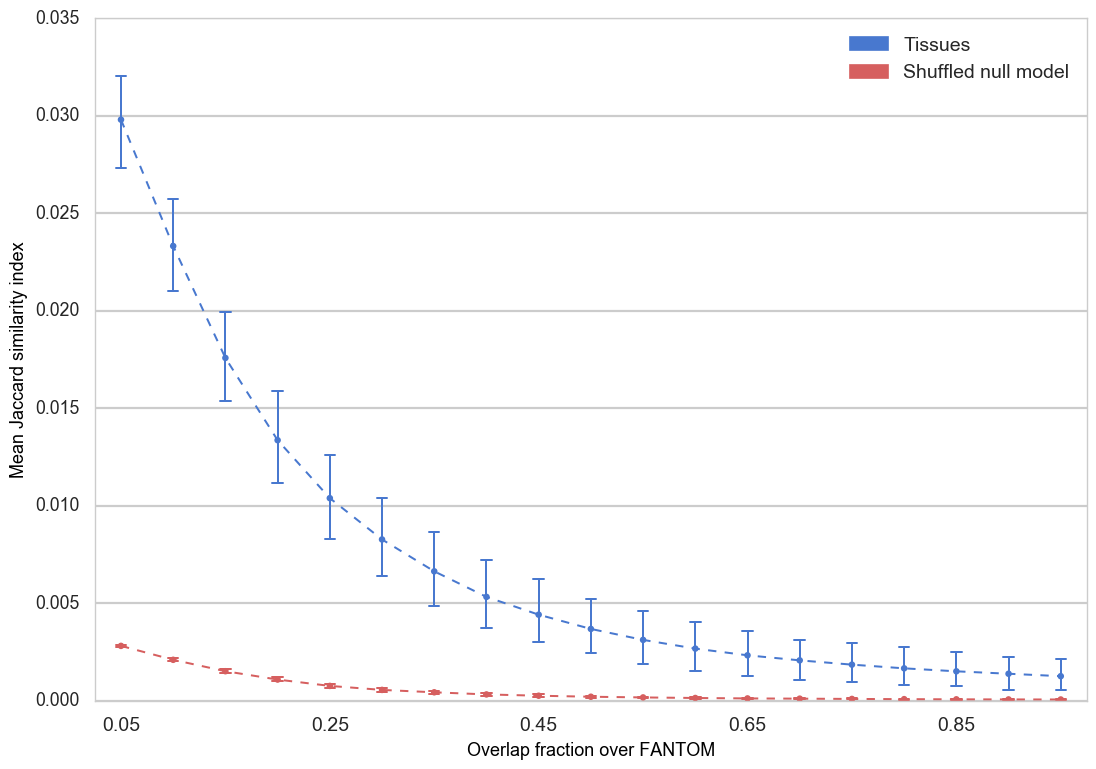

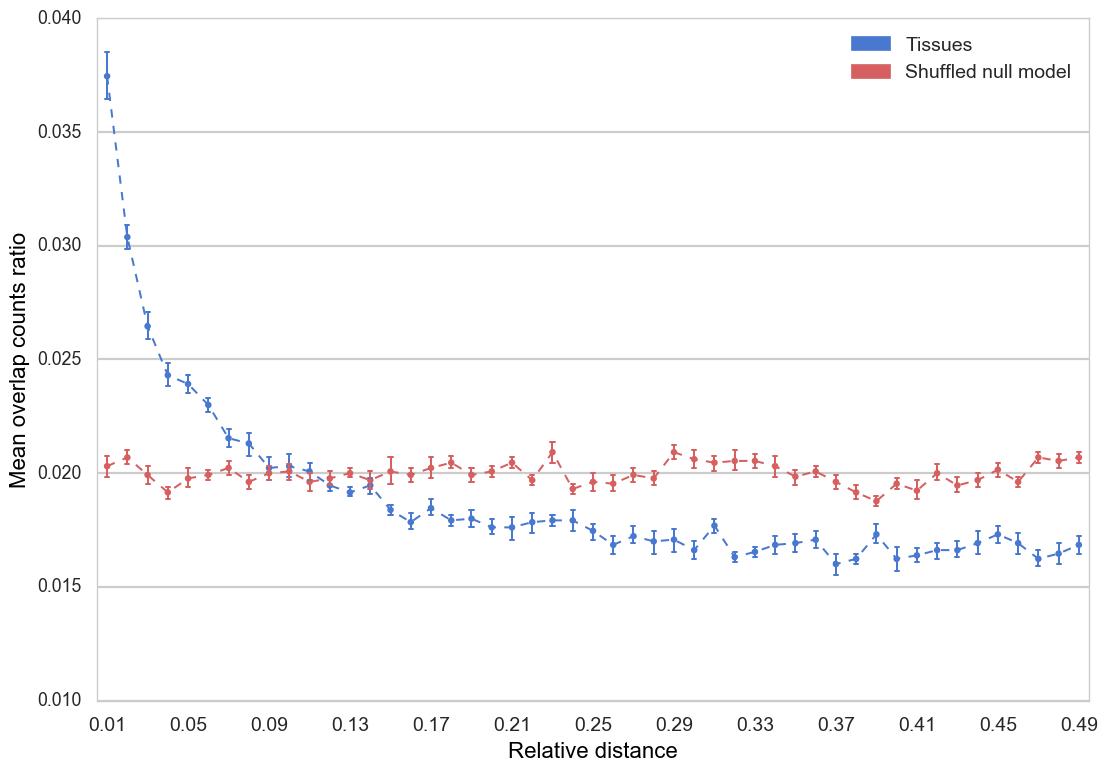

In [148]:
ovlp_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'overlap_hg19_DNase_H3K27ac_tissue_permissive')
reldist_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'reldist_hg19_DNase_H3K27ac_tissue_permissive')
plot_jaccard(ovlp_df, 'Tissues')

plot_reldist(reldist_df.query("reldist > 0 & reldist < 0.5"), 'Tissues')

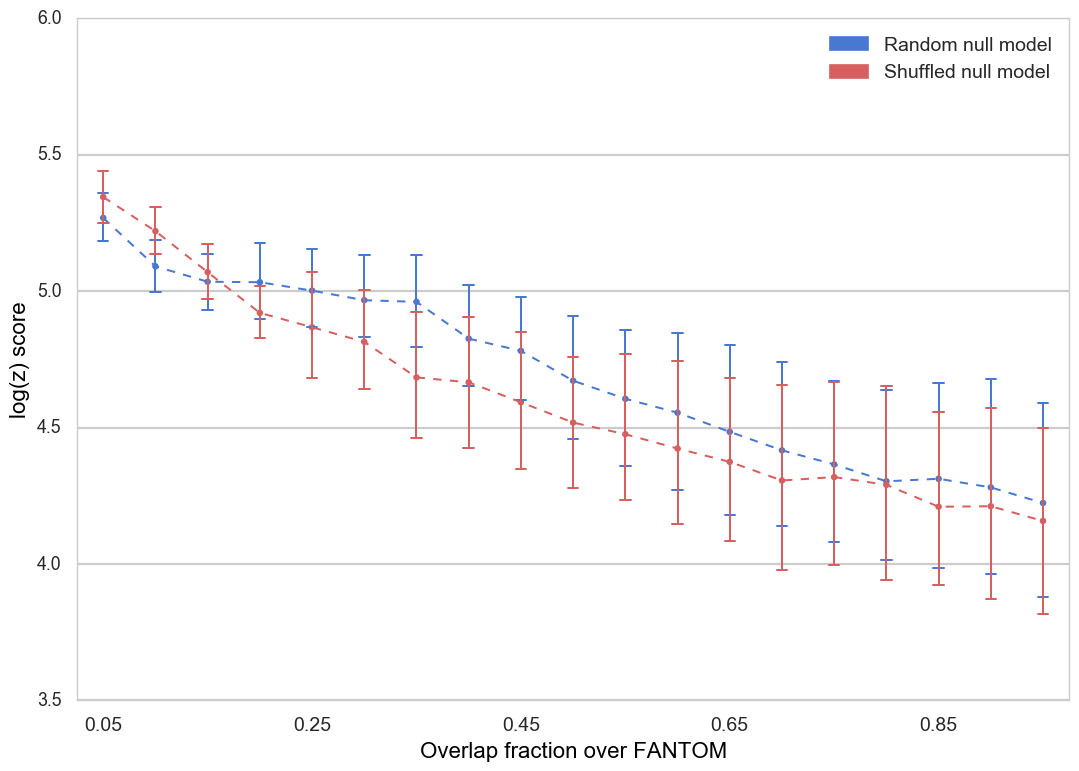

In [142]:
import numpy as np
import scipy.stats as st
ovlp_df['log_z_random'] = np.log(ovlp_df['z_random'])
ovlp_df['log_z_shuffled'] = np.log(ovlp_df['z_shuffled'])
ovlp_df['z_pvalue_random'] = ovlp_df.apply(lambda row: st.norm.sf(abs(row['z_random'])), axis=1)
ovlp_df['z_pvalue_shuffled'] = ovlp_df.apply(lambda row: st.norm.sf(abs(row['z_shuffled'])), axis=1)

plot_z(ovlp_df.query('ovlp_encyclopedia=="permissive"'))

### Stem cells

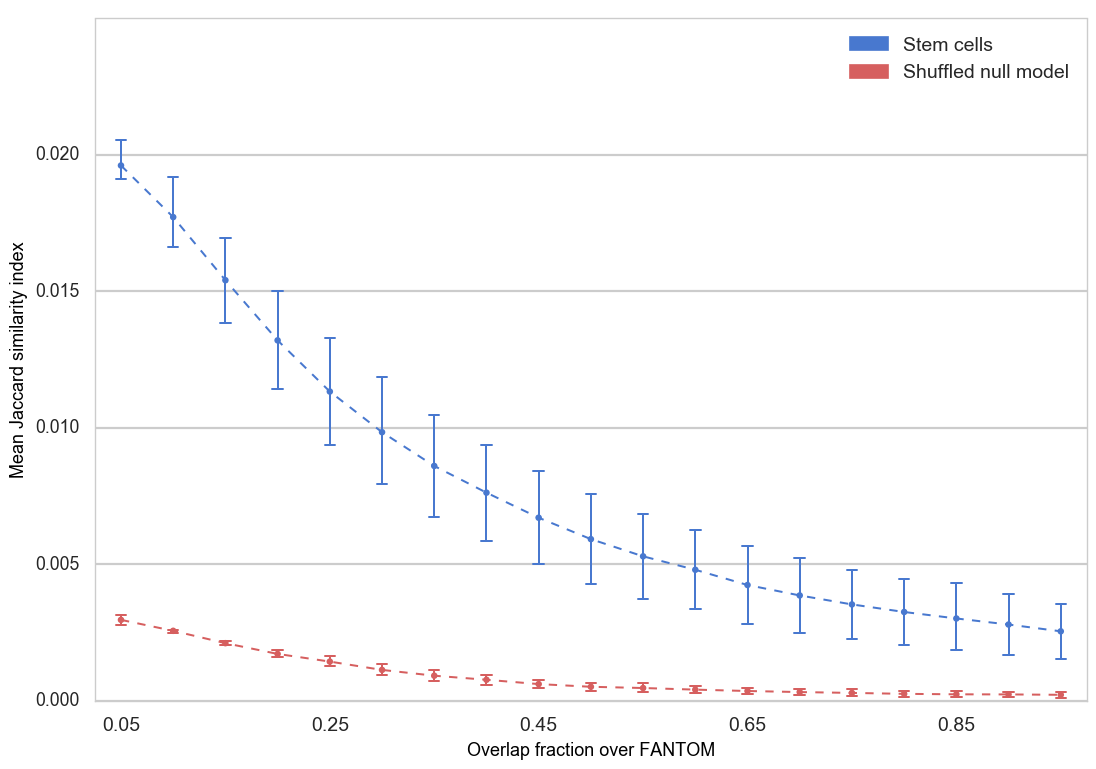

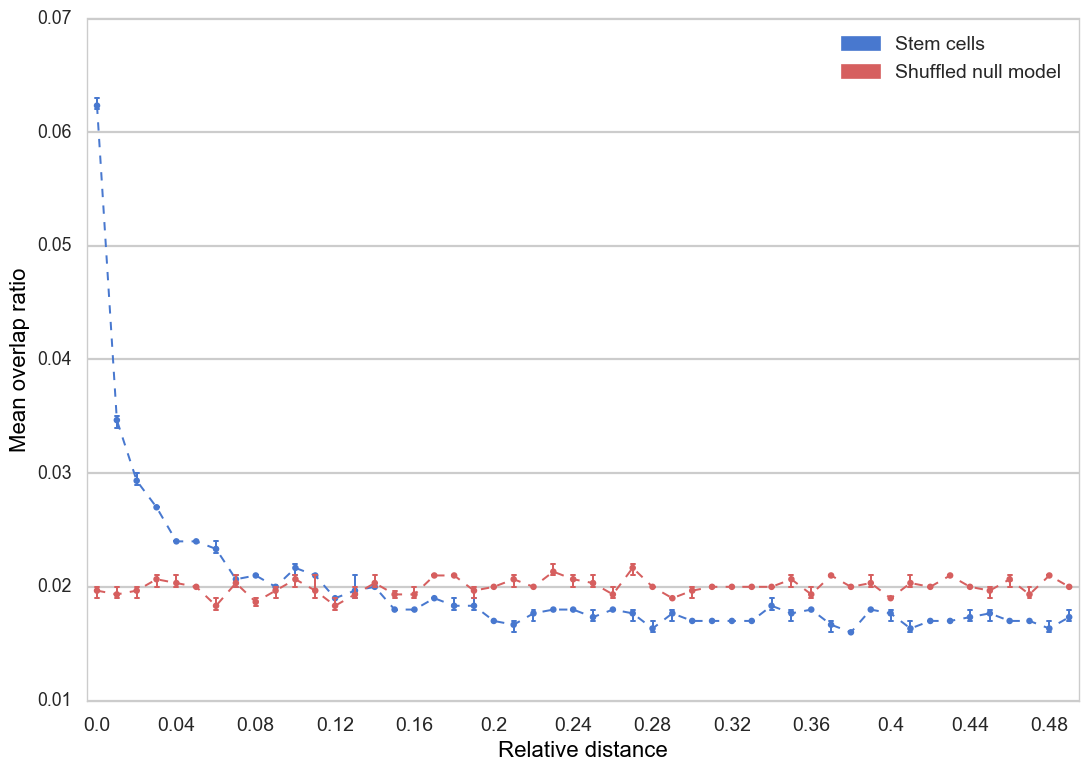

In [119]:
ovlp_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'overlap_hg19_DNase_H3K27ac_stem_cell_permissive')
reldist_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'reldist_hg19_DNase_H3K27ac_stem_cell_permissive')
plot_jaccard(ovlp_df, 'Stem cells')
plot_reldist(reldist_df, 'Stem cells')

### Immortalized cell lines

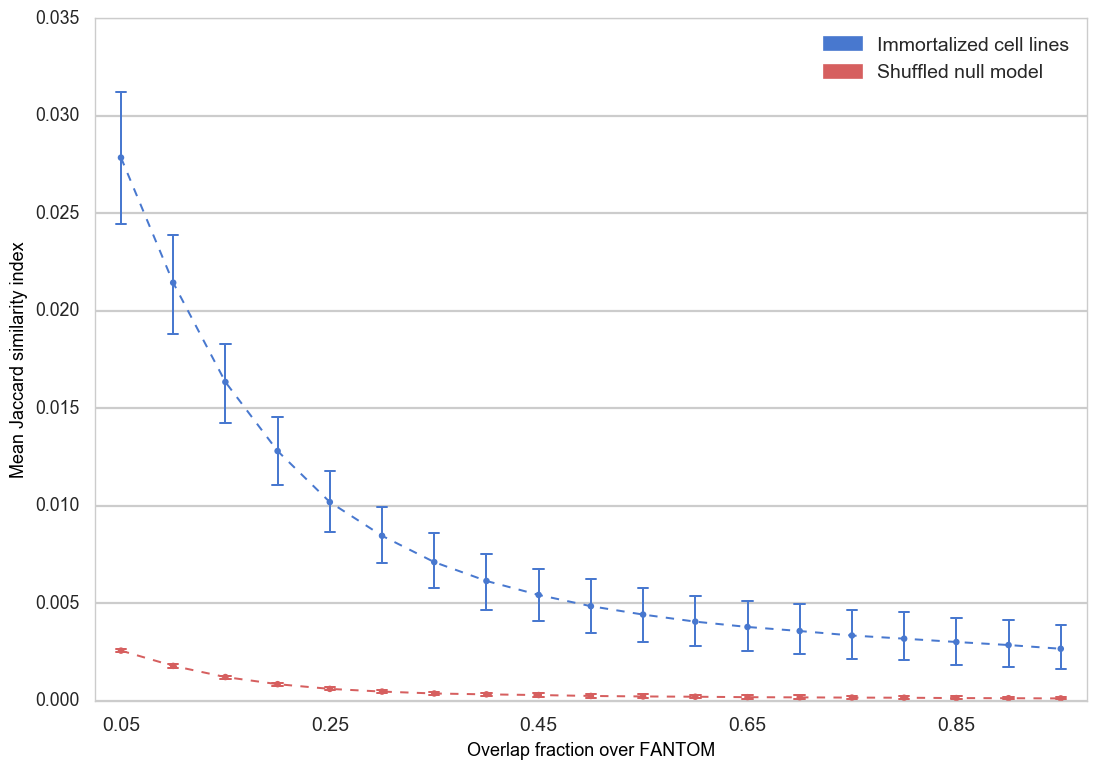

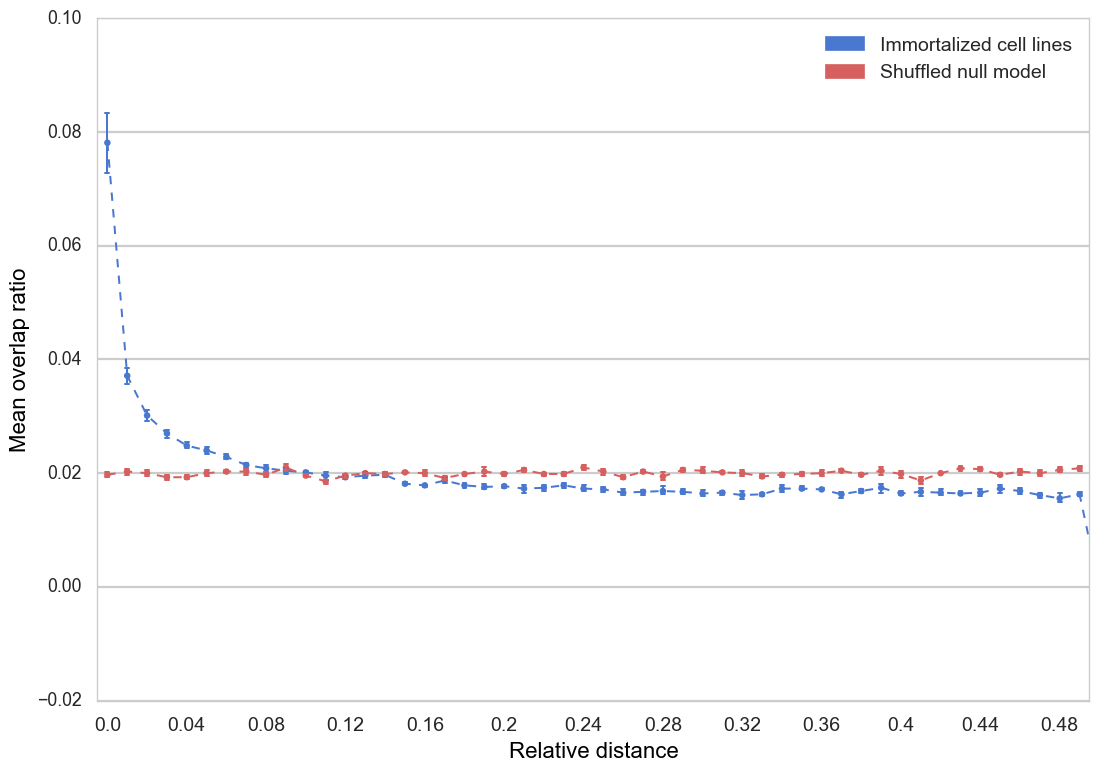

In [121]:
ovlp_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'overlap_hg19_DNase_H3K27ac_immortalized_cell_line_permissive')
reldist_df = pd.read_hdf('../storage/encode_fantom_stats.hdf', 'reldist_hg19_DNase_H3K27ac_immortalized_cell_line_permissive')
plot_jaccard(ovlp_df, 'Immortalized cell lines')
plot_reldist(reldist_df, 'Immortalized cell lines')